<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

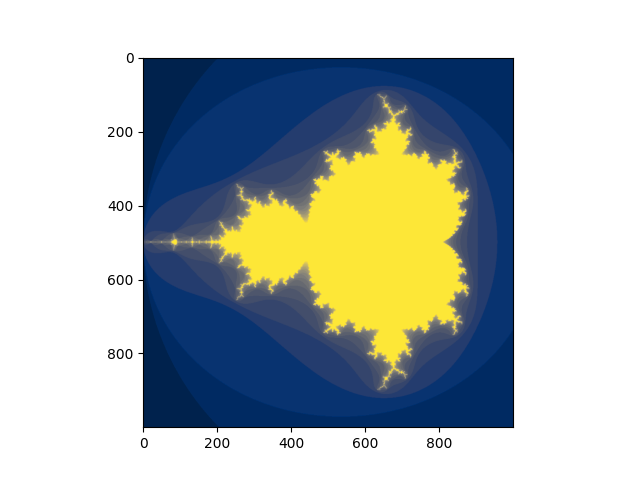

In [13]:
# à vous de jouer
def mandelbrot(w, h):
    inf_re,max_re,inf_im,max_im=-2,0.8,-1.4,1.4
    point_re=np.resize(np.linspace(inf_re,max_re,h),(1,h))
    point_im=np.resize(np.linspace(inf_im,max_im,w),(w,1))
    tab=point_re + 1j*point_im
    max = 20
    def nb_iteration(c):
        compteur,zn=0,c
        for i in range (max):
            if abs(zn)>2:
                break
            zn=zn**2+c
            compteur+=1
        return compteur
    diverge=np.vectorize(nb_iteration)(point_re+1j*point_im)
    plt.imshow(diverge,cmap='cividis',norm='linear')
    plt.show()
mandelbrot(1000,1000)

## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook

In [14]:
# Passage de nouveaux paramètres :
def mandelbrot(w, h,inf_re,max_re,inf_im,max_im,max):
    point_re=np.resize(np.linspace(inf_re,max_re,h),(1,h))
    point_im=np.resize(np.linspace(inf_im,max_im,w),(w,1))
    tab=point_re + 1j*point_im
    max = 20
    def nb_iteration(c):
        compteur,zn=0,c
        for i in range (max):
            if abs(zn)>2:
                break
            zn=zn**2+c
            compteur+=1
        return compteur
    diverge=np.vectorize(nb_iteration)(point_re+1j*point_im)
    plt.imshow(diverge,cmap='cividis',norm='linear')
    plt.show()

In [17]:
#Introduction de l'image dans l'énoncé
#Les formats peuvent être .png, .svg, .jpg,... (le pdf semble aussi convenir d'après la documentation de la fonction plt.imsave, mais ce n'est pas le plus habituel...)


def mandelbrot(w, h):
    inf_re,max_re,inf_im,max_im=-2,0.8,-1.4,1.4
    point_re=np.resize(np.linspace(inf_re,max_re,h),(1,h))
    point_im=np.resize(np.linspace(inf_im,max_im,w),(w,1))
    tab=point_re + 1j*point_im
    max = 20
    def nb_iteration(c):
        compteur,zn=0,c
        for i in range (max):
            if abs(zn)>2:
                break
            zn=zn**2+c
            compteur+=1
        return compteur
    diverge=np.vectorize(nb_iteration)(point_re+1j*point_im)
    return diverge
diverge = mandelbrot(1000,1000)
plt.imsave('Mandelbrot_eleve.jpg',diverge,cmap='cividis')
plt.imsave('Mandelbrot_eleve.png',diverge,cmap='cividis')


### Affichage de l'image générée par ma fonction dans le Notebook :

![Image générée par mon code](Mandelbrot_eleve.jpg "Mandelbrot réalisé par Luc")